<a href="https://colab.research.google.com/github/Exferro/anqs_quantum_chemistry/blob/main/colab_toy_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Exferro/anqs_quantum_chemistry.git

Cloning into 'anqs_quantum_chemistry'...
remote: Enumerating objects: 137, done.
remote: Counting objects: 100% (137/137), done.
remote: Compressing objects: 100% (112/112), done.
remote: Total 137 (delta 27), reused 128 (delta 22), pack-reused 0
Receiving objects: 100% (137/137), 139.63 KiB | 6.98 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [2]:
!pip install -r ./anqs_quantum_chemistry/requirements.txt

Looking in indexes: https://pypi.org/simple, https://download.pytorch.org/whl/cu118, https://download.pytorch.org/whl/cu118, https://download.pytorch.org/whl/cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 516.3/516.3 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 13.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 47.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (

In [3]:
import os
import json

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [4]:
import sys
import importlib

In [7]:
!cd ./anqs_quantum_chemistry/nqs; python -m pip install -e .

Obtaining file:///content/anqs_quantum_chemistry/nqs
  Preparing metadata (setup.py) ... done
  Attempting uninstall: nqs
    Found existing installation: nqs 0.1
    Uninstalling nqs-0.1:
      Successfully uninstalled nqs-0.1
  Running setup.py develop for nqs


In [20]:
sys.path.append('./anqs_quantum_chemistry/nqs')

In [23]:
from nqs.nqs.applications.quantum_chemistry.molecule import GeometryConfig, MolConfig
from nqs.nqs.applications.quantum_chemistry.experiments.preparation import create_mol

from nqs.nqs.applications.quantum_chemistry.experiments.energy_opt_exp import EnergyOptExpConfig, EnergyOptExp

from nqs.nqs.applications.quantum_chemistry import CHEMICAL_ACCURACY

In [24]:
mols_root_dir = './molecules'

mol_name = 'Li2O'

In [25]:
geom = [["O", [0.0, 0.0, 0.0]],
        ["Li", [0.0, 0.0, 1.51903]],
        ["Li", [0.0, 0.0, -1.51903]]]

geom_config = GeometryConfig(type='toy', idx=0)
geom_dir = os.path.join(mols_root_dir,
                       f'name={mol_name}',
                       'geometries',
                        geom_config.to_path_suffix())

if not os.path.exists(geom_dir):
    os.makedirs(geom_dir)

geom_filename = os.path.join(geom_dir, 'geom.json')

if not os.path.exists(geom_filename):
    with open(geom_filename, 'w') as f:
        json.dump(geom, f)
else:
    print(f'You are trying to overwrite an existing geometry at {geom_filename}')

In [ ]:
mol_config = MolConfig(name=mol_name,
                       geom_config=geom_config,
                       basis='sto-3g')
mol = create_mol(config=mol_config,
                 mols_root_dir=mols_root_dir)

The molecule didn't exist
[['O', [0.0, 0.0, 0.0]], ['Li', [0.0, 0.0, 1.51903]], ['Li', [0.0, 0.0, -1.51903]]]
[['O', [0.0, 0.0, 0.0]], ['Li', [0.0, 0.0, 1.51903]], ['Li', [0.0, 0.0, -1.51903]]]
converged SCF energy = -88.5815304220191
E(RCISD) = -88.69115384730225  E_corr = -0.1096234252831261
E(CCSD) = -88.69444462196277  E_corr = -0.1129141999436549
CCSD(T) correction = -0.0109613668365979
HUI
converged SCF energy = -88.581530422019
E(CCSD) = -88.69444462196265  E_corr = -0.1129141999436542
CCSD(T) correction = -0.0109613668365981


In [6]:
series_name = 'toy'
exp_config = EnergyOptExpConfig(mols_root_dir=mols_root_dir,
                                mol_config=mol_config,
                                series_name=series_name)
exp_config.local_energy_config.use_tree_for_candidates = 'trie'
exp_config.proc_grad_schedule[0][1].use_sr = True
exp_config.proc_grad_schedule[0][1].sr_config.max_indices_num = 50

In [11]:
energy_opt_exp = EnergyOptExp(config=exp_config,
                              mol=mol)

/usr/local/lib/python3.10/dist-packages/pennylane/ops/op_math/prod.py:499: PennyLaneDeprecationWarning: Prod.ops is deprecated and will be removed in future releases. You can access both (coeffs, ops) via op.terms() Also consider op.operands.
  warnings.warn(


In [12]:
for method in ('hf', 'cisd', 'ccsd', 'ccsd_t', 'fci'):
    print(f'{method} energy: {getattr(energy_opt_exp.mol, f"{method}_energy")}')
if energy_opt_exp.mol.fci_energy is not None:
    print(f'fci energy up to chem. acc.: {energy_opt_exp.mol.fci_energy + CHEMICAL_ACCURACY}')
energy_opt_exp.run(iter_num=500)

hf energy: -88.58153042201904
cisd energy: -88.69115384730216
ccsd energy: -88.69444462196272
ccsd_t energy: -88.70540598879931
fci energy: -88.70545072446289
fci energy up to chem. acc.: -88.7038507244629


  0%|          | 0/500 [00:00<?, ?it/s]

# Building plots

In [7]:
series_dir = os.path.join(mol.dir, 'exp_series', series_name)
result_filename = os.path.join(series_dir, f'{exp_config.to_sha256_str()}', 'result.csv')
result = pd.read_csv(result_filename)

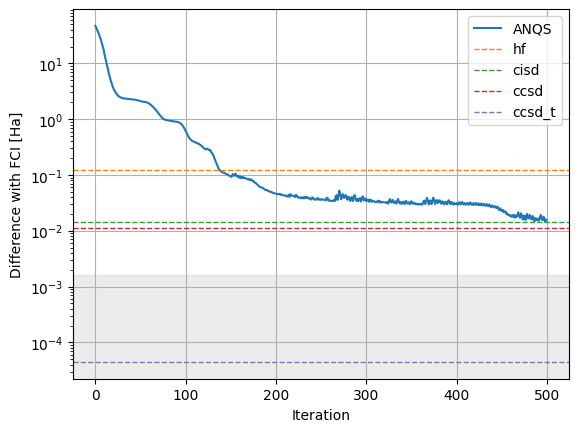

In [8]:
fig, ax = plt.subplots()
ax.grid()
ax.plot(result['iter_idx'],
        result['sample_aware_energy'] - mol.fci_energy,
        label='ANQS')
ax.set_yscale('log')

x_lim = ax.get_xlim()

point_num = 10
x_axis = np.linspace(x_lim[0], x_lim[1], point_num)
for method in ('hf', 'cisd', 'ccsd', 'ccsd_t'):
    ax.plot(x_axis,
            np.ones_like(x_axis) * getattr(mol, f'{method}_energy') - mol.fci_energy,
            label=method,
            linestyle='dashed',
            linewidth=1)
ax.fill_between([x_lim[0], x_lim[1]], 0, 1.6e-3, color='grey', alpha=0.15)
ax.set_xlim(x_lim)

ax.set_xlabel('Iteration')
ax.set_ylabel('Difference with FCI [Ha]')
ax.legend(loc='best')